In [1]:
#Import libraries
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
from google.colab import drive
from google.colab import files
import kagglehub
from transformers import pipeline
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Set the path to the file you'd like to load
# Replace 'Reviews.csv' with the actual file name from the dataset if it's different
file_path = 'Reviews.csv'

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "snap/amazon-fine-food-reviews",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

#عرض 5 عينات من dataset
df.head(5)

/tmp/ipython-input-2557974320.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
#We Take 2000 random samples
df_sample = df.sample(n=2000, random_state=42).copy()

# Show the DataFrame
df_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...
...,...,...,...,...,...,...,...,...,...,...
325081,325082,B0002DGRRA,A1WKFVJCSW1OW6,R. Chan,0,0,5,1270425600,Good Stuff,"Received very timely, and packed safely; no bu..."
197612,197613,B000NME7F4,A29QB0BWELAZHH,Rob S,1,1,5,1305849600,simply the best!,Absolutely love this candy. It's the best and...
16249,16250,B007TJGZ54,AEMI84HPCXI22,"Sharon Cooley ""Songbird""",0,0,5,1338076800,Extremely enjoyable,I have been having difficulty finding this ble...
135220,135221,B002910N6Y,A1Q01POMTXPWML,"Nicole Fiero ""fro yo lover""",0,0,4,1266278400,"good, not great",Arctic Zero is a tasty frozen treat with very ...


In [4]:
#ترتيب الدانا من 0 الى 1999
df_sample.reset_index(drop=True, inplace=True)
#حذف الاعمدةالغير مهمه
df_sample.drop(['Id', 'UserId',
                'Summary','ProductId','ProfileName',
                'Time'], axis=1, inplace=True, errors='ignore')
df_sample

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text
0,0,0,5,Having tried a couple of other brands of glute...
1,0,0,5,My cat loves these treats. If ever I can't fin...
2,0,2,3,A little less than I expected. It tends to ha...
3,0,1,2,"First there was Frosted Mini-Wheats, in origin..."
4,0,2,5,and I want to congratulate the graphic artist ...
...,...,...,...,...
1995,0,0,5,"Received very timely, and packed safely; no bu..."
1996,1,1,5,Absolutely love this candy. It's the best and...
1997,0,0,5,I have been having difficulty finding this ble...
1998,0,0,4,Arctic Zero is a tasty frozen treat with very ...


In [5]:
df_sample.isnull().sum()

,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Text,0


In [6]:
#نشوف اقل قيمة واكبر قيمة فالفيتشرز
df_sample["HelpfulnessNumerator"].min(), df_sample["HelpfulnessNumerator"].max()
df_sample["HelpfulnessDenominator"].min(), df_sample["HelpfulnessDenominator"].max()

(0, 126)

In [7]:
# (1) معالجة البيانات feature engineering , helpful_ratio اضافة عامود
df_sample["helpful_ratio"] = 0 #قيمة افتراضية

mask = df_sample["HelpfulnessDenominator"] > 0 #اخذ فقط الاصوات الي اكبر من 0

df_sample.loc[mask, "helpful_ratio"] = (
    df_sample.loc[mask, "HelpfulnessNumerator"] /
    df_sample.loc[mask, "HelpfulnessDenominator"]
)
df_sample

/tmp/ipython-input-3191913887.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0. 0. 0. ... 1. 1. 1.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_sample.loc[mask, "helpful_ratio"] = (


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text,helpful_ratio
0,0,0,5,Having tried a couple of other brands of glute...,0.0
1,0,0,5,My cat loves these treats. If ever I can't fin...,0.0
2,0,2,3,A little less than I expected. It tends to ha...,0.0
3,0,1,2,"First there was Frosted Mini-Wheats, in origin...",0.0
4,0,2,5,and I want to congratulate the graphic artist ...,0.0
...,...,...,...,...,...
1995,0,0,5,"Received very timely, and packed safely; no bu...",0.0
1996,1,1,5,Absolutely love this candy. It's the best and...,1.0
1997,0,0,5,I have been having difficulty finding this ble...,0.0
1998,0,0,4,Arctic Zero is a tasty frozen treat with very ...,0.0


In [8]:
df_sample["helpful_ratio"].min(), df_sample["helpful_ratio"].max() #توضيح ان قيم الريشيو بين ال0 و1

(0.0, 1.0)

In [9]:
# (2) حساب عدد الاحرف لتعليقات (text) , معالجة text
df_sample["text_length"] = df_sample["Text"].str.len()
df_sample

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text,helpful_ratio,text_length
0,0,0,5,Having tried a couple of other brands of glute...,0.0,485
1,0,0,5,My cat loves these treats. If ever I can't fin...,0.0,490
2,0,2,3,A little less than I expected. It tends to ha...,0.0,136
3,0,1,2,"First there was Frosted Mini-Wheats, in origin...",0.0,1631
4,0,2,5,and I want to congratulate the graphic artist ...,0.0,649
...,...,...,...,...,...,...
1995,0,0,5,"Received very timely, and packed safely; no bu...",0.0,262
1996,1,1,5,Absolutely love this candy. It's the best and...,1.0,161
1997,0,0,5,I have been having difficulty finding this ble...,0.0,265
1998,0,0,4,Arctic Zero is a tasty frozen treat with very ...,0.0,341


In [10]:
# (3) مؤشر رضا العملاء
def customer_review(score):
    if score <= 3:
        return 0   # غير راضي
    else:
        return 1   # راضي

df_sample['CR'] = df_sample['Score'].apply(customer_review)

df_sample.head(5)

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text,helpful_ratio,text_length,CR
0,0,0,5,Having tried a couple of other brands of glute...,0.0,485,1
1,0,0,5,My cat loves these treats. If ever I can't fin...,0.0,490,1
2,0,2,3,A little less than I expected. It tends to ha...,0.0,136,0
3,0,1,2,"First there was Frosted Mini-Wheats, in origin...",0.0,1631,0
4,0,2,5,and I want to congratulate the graphic artist ...,0.0,649,1


In [11]:
#عدد الراضين والغير راضين
df_sample['CR'].value_counts()

,count
CR,
1,1575
0,425


In [12]:
#تحليل المشاعر  باستخدام Hugging Face (3)
# تحويل text إلى string + واخذ منه اول 512 حرف لتسريع التحليل ومنع الأخطاء
df_sample["Text"] = df_sample["Text"].astype(str).str.slice(0, 512)

texts = df_sample["Text"].tolist()


#  Hugging Face Pipeline (GPU)

classifier = pipeline(
    "sentiment-analysis",
    device=0   # GPU
)
# التنبؤ بالمشاعر باستخدام المعالجة على دفعات لتسريع التنفيذ
results = []
BATCH_SIZE = 32
for i in tqdm(range(0, len(texts), 500)):
    batch = texts[i:i+500]
    results.extend(
        classifier(
            batch,
            truncation=True,
            batch_size=BATCH_SIZE
        )
    )
#  إضافة النتائج للـ DataFrame
df_sample["sentiment_label_HF"] = [r["label"] for r in results]
df_sample["sentiment_score_HF"] = [r["score"] for r in results]
# تحويلها لقيم رقمية (للتحليل)
df_sample["sentiment_HF"] = df_sample["sentiment_label_HF"].apply(
    lambda x: 1 if x == "POSITIVE" else 0
)

# عرض عينة

df_sample[["Text", "sentiment_label_HF", "sentiment_score_HF"]].head(5)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

100%|██████████| 4/4 [00:10<00:00,  2.65s/it]


,Text,sentiment_label_HF,sentiment_score_HF
0,Having tried a couple of other brands of glute...,POSITIVE,0.999240
1,My cat loves these treats. If ever I can't fin...,POSITIVE,0.997516
2,A little less than I expected. It tends to ha...,NEGATIVE,0.999433
3,"First there was Frosted Mini-Wheats, in origin...",POSITIVE,0.937716
4,and I want to congratulate the graphic artist ...,POSITIVE,0.997636


In [13]:
#نشوف هل تتوافق نتائج التقييم مع تحليل المشاعر عن طريق Cross Tabulation
pd.crosstab(df_sample["Score"], df_sample["sentiment_label_HF"])


sentiment_label_HF,NEGATIVE,POSITIVE
Score,,
1,159,13
2,91,16
3,93,53
4,82,225
5,208,1060


In [14]:


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

 #معالجة Text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words  # قائمة كلمات بدل نص

df_sample['clean_words'] = df_sample['Text'].apply(clean_text)

#  جمع كل الكلمات حسب CR
words_satisfied = [word for sublist in df_sample[df_sample['CR']==1]['clean_words'] for word in sublist]
words_unsatisfied = [word for sublist in df_sample[df_sample['CR']==0]['clean_words'] for word in sublist]




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
#استدعاء المكتبات
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.corpus import stopwords

# تنظيف النصوص
stop_words = set(stopwords.words('english')).union({'br','one','would','product' , 'amazon'})
df_sample['clean_words'] = df_sample['Text'].apply(clean_text)

# إعداد محلل المشاعر
sia = SentimentIntensityAnalyzer()

# حساب عدد الكلمات الإيجابية والسلبية لكل مراجعة
positive_list = ['like', 'good', 'great', 'love', 'best']
negative_list = ['hard', 'bad', 'low', 'problem', 'bitter']

def count_sentiment_words(words):
    pos_count = sum(1 for w in words if w in positive_list)
    neg_count = sum(1 for w in words if w in negative_list)
    return pd.Series([pos_count, neg_count])

df_sample[['pos_count', 'neg_count']] = df_sample['clean_words'].apply(count_sentiment_words)

# تحديد النتيجة إيجابي/سلبي فقط (لا يوجد محايد)
def sentiment_label(row):
    if row['pos_count'] > row['neg_count']:
        return 1  # إيجابي
    elif row['neg_count'] > row['pos_count']:
        return 0  # سلبي
    else:
        return None  # متساوي أو صفر، يمكن حذفها لاحقًا

df_sample['sentiment_CR'] = df_sample.apply(sentiment_label, axis=1)
df_sample = df_sample.dropna(subset=['sentiment_CR'])  # حذف المحايد

# عرض النتائج
print(df_sample[['Text','pos_count','neg_count','sentiment_CR']].head(5))

#sentiment_CR ليس مرتبط بالـ Score أو CR الأصلي، بل يعتمد فقط على المشاعر ايجابية ام سلبية في النص.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  pos_count  neg_count  \
0  Having tried a couple of other brands of glute...          2          0   
1  My cat loves these treats. If ever I can't fin...          3          0   
3  First there was Frosted Mini-Wheats, in origin...          2          0   
6  I absolutely love Yorkshire tea and am so glad...          2          0   
7  I have such a hard time finding loose tea loca...          0          1   

   sentiment_CR  
0           1.0  
1           1.0  
3           1.0  
6           1.0  
7           0.0  


In [16]:
#تحديد التارقت والفيتشرز
y = df_sample["CR"]
X = df_sample[[ "text_length", "sentiment_HF", "helpful_ratio", "sentiment_score_HF", "pos_count", "neg_count"]]

In [17]:
#تقسيم البيانات test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1088, 6)
Testing set shape: (273, 6)


In [18]:
from sklearn.preprocessing import RobustScaler

# ضبط المقاييس (Scaling) لمنع تسريب البيانات
rob_scaler = RobustScaler()
X_train[['text_length']] = rob_scaler.fit_transform(X_train[['text_length']])
X_test[['text_length']] = rob_scaler.transform(X_test[['text_length']])

#استخدمنا ال class weight  عشان نعالج عدم التوازن
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
print(f"Weights for (Not Satisfied 0): {weights[0]:.2f}")
print(f"Weights for (Satisfied 1): {weights[1]:.2f}")

Weights for (Not Satisfied 0): 2.76
Weights for (Satisfied 1): 0.61


In [19]:
# عرض القيم قبل وبعد الـ Scaling
print("--- القيم الأصلية في df_sample (Raw Data) ---")
display(df_sample[['text_length']].head())

print("\n--- القيم بعد الـ Scaling في X_train (Processed Data) ---")
display(X_train[['text_length']].head())


--- القيم الأصلية في df_sample (Raw Data) ---


,text_length
0,485
1,490
3,1631
6,181
7,253



--- القيم بعد الـ Scaling في X_train (Processed Data) ---


,text_length
860,0.361111
657,-0.179825
795,-0.483918
1807,-0.314327
1943,-0.568713


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

#نخلي المودل يركز على اهم 500 كلمة ويحطها كفيتشرز
tfidf = TfidfVectorizer(max_features=500, stop_words='english') # حذفنا الكلمات التي تعتبر بدون فايدة " (مثل a, an, in, of)


# المودل هنا "يتعلم" الكلمات المهمة من بيانات التدريب ويحولها لأرقام.
X_train_tfidf = tfidf.fit_transform(df_sample.loc[X_train.index, 'Text']).toarray()
# المودل هنا "يطبق" ما تعلمه فقط على بيانات الاختبار.
X_test_tfidf = tfidf.transform(df_sample.loc[X_test.index, 'Text']).toarray()


tfidf_train_df = pd.DataFrame(X_train_tfidf, index=X_train.index, columns=tfidf.get_feature_names_out())
tfidf_test_df = pd.DataFrame(X_test_tfidf, index=X_test.index, columns=tfidf.get_feature_names_out())

X_train_final = pd.concat([X_train, tfidf_train_df], axis=1)
X_test_final = pd.concat([X_test, tfidf_test_df], axis=1)

print(f"Number of features after TF-IDF: {X_train_final.shape[1]}")

Number of features after TF-IDF: 506


In [21]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# 1. Support Vector Classifier
svm_model = SVC(class_weight='balanced', probability=True)
svm_model.fit(X_train_final, y_train)

# 2. K-Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_final, y_train)

# 3. Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train_final, y_train)

# 4. Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_final, y_train)

# 5. Passive Aggressive Classifier
pa_model = PassiveAggressiveClassifier(class_weight='balanced')
pa_model.fit(X_train_final, y_train)

# 6. Perceptron
per_model = Perceptron(class_weight='balanced')
per_model.fit(X_train_final, y_train)

# 7. Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_final, y_train, sample_weight=sample_weights)

# 8. Multi-layer Perceptron (Neural Network)
ann_model = MLPClassifier(random_state=42)
ann_model.fit(X_train_final, y_train)

# 9. Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_final, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 0.8791
Precision: 0.9484
Recall: 0.9018
F1-score: 0.9245


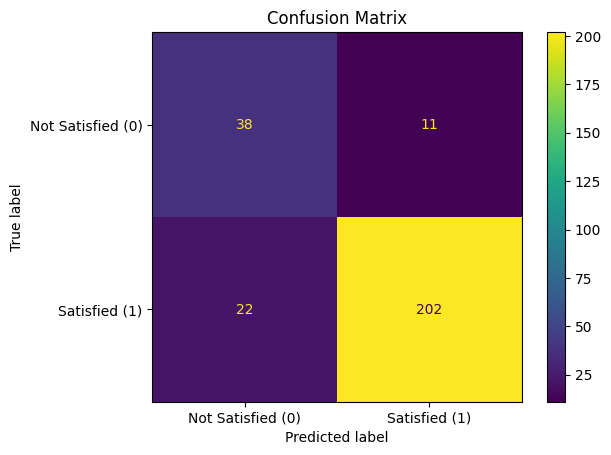

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = lr_model.predict(X_test_final)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Satisfied (0)', 'Satisfied (1)'])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

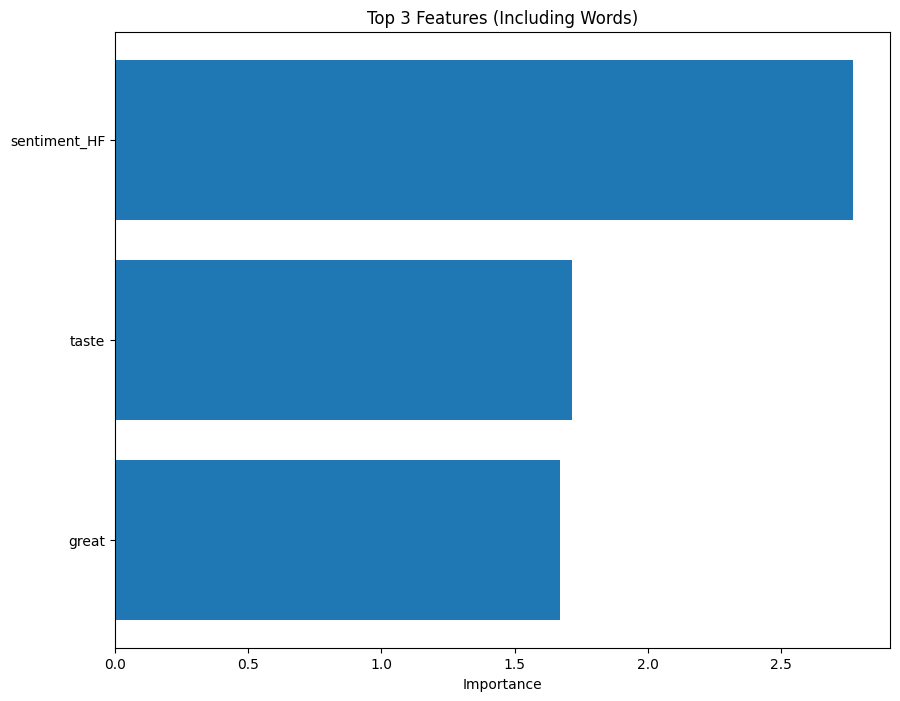

In [23]:
importances = abs(lr_model.coef_[0]) # Use coefficients for Logistic Regression
feature_importance_df = pd.DataFrame({
    'feature': X_train_final.columns, # هنا استخدمنا الأعمدة الجديدة
    'importance': importances
}).sort_values(by='importance', ascending=False)

# أهم 3 عوامل مؤثرة

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df.head(3)['feature'], feature_importance_df.head(3)['importance'])
plt.xlabel('Importance')
plt.title('Top 3 Features (Including Words)')
plt.gca().invert_yaxis()
plt.show()

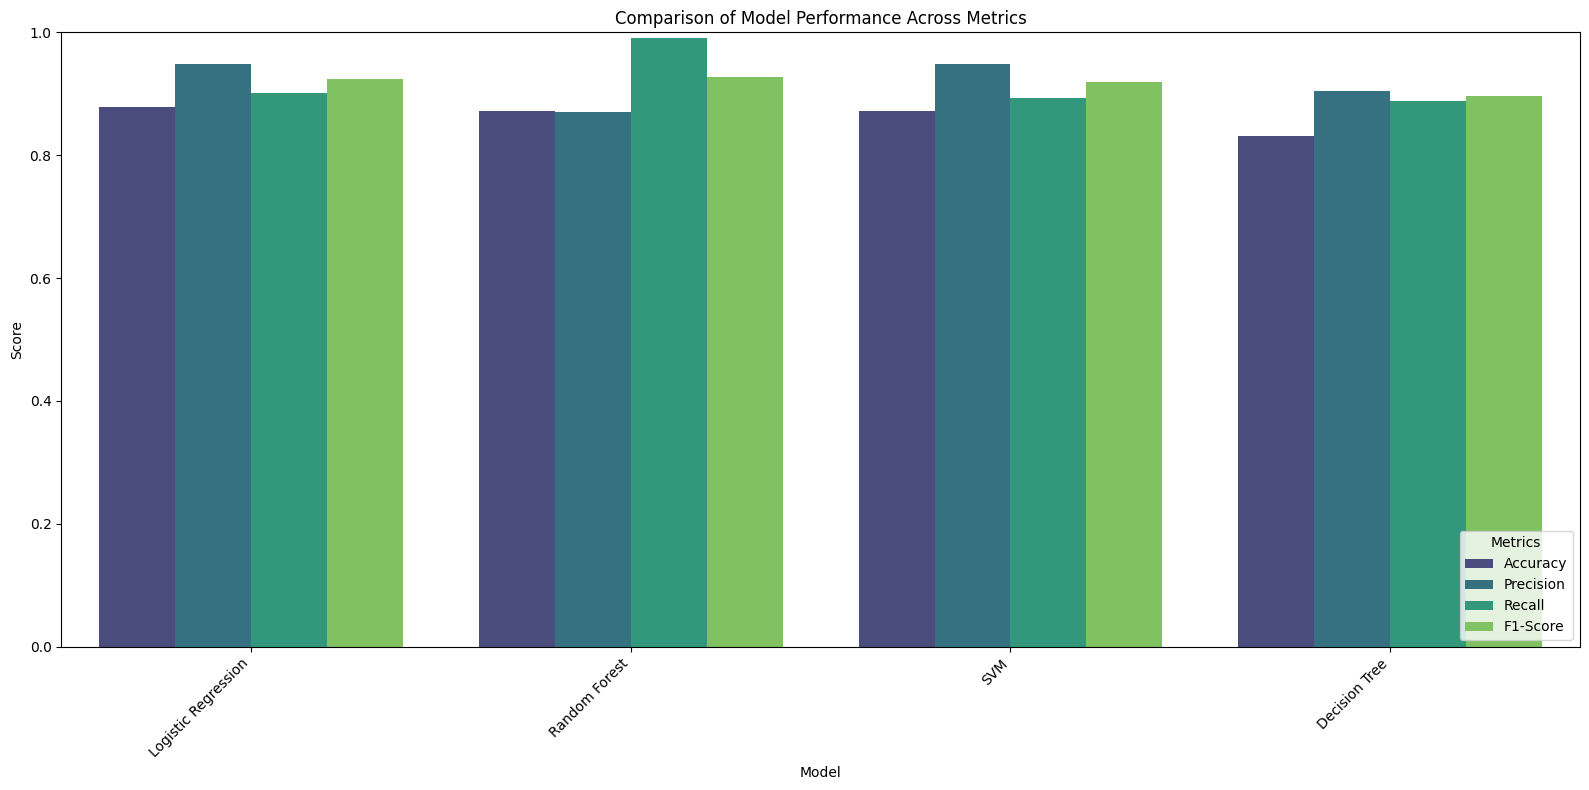

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.879121,0.948357,0.901786,0.924485
1,Random Forest,0.871795,0.870588,0.991071,0.926931
2,SVM,0.871795,0.947867,0.892857,0.919540
3,Decision Tree,0.831502,0.904545,0.888393,0.896396


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تعريف قائمة بالموديلات التي دربناها
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'Decision Tree': dt_model
}

# حساب المقاييس لكل موديل
comparison_results = []

for name, model in models.items():
    y_pred_temp = model.predict(X_test_final)
    comparison_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred_temp),
        'Precision': precision_score(y_test, y_pred_temp),
        'Recall': recall_score(y_test, y_pred_temp),
        'F1-Score': f1_score(y_test, y_pred_temp)
    })

# تحويل النتائج لجدول مرتب
comparison_df = pd.DataFrame(comparison_results).sort_values(by='Accuracy', ascending=False)

# تحويل DataFrame لتنسيق مناسب للرسم البياني المجمع
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

#  رسم بياني للمقارنة بين الموديلات وجميع المقاييس
plt.figure(figsize=(16, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted, palette='viridis')
plt.title('Comparison of Model Performance Across Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', loc='lower right') # Changed 'bottom right' to loc='lower right'
plt.tight_layout()
plt.show()

# عرض الجدول النهائي للمقارنة
display(comparison_df)